In [1]:
%load_ext autoreload
%autoreload 2

import sys  
sys.path.insert(0, 'functions')
sys.path.insert(0, 'training')

In [2]:
from Clusterer import *
from plotting import *
from data_functions import *

### This notebook should remain unchanged, with the exception of editing the values in the cell directly below

In [3]:
root_file = "hcal_pi-_Theta20n20deg_0-60GeVLogUniform.root"
label ="Fifty_Segmentation3L_HCal_0-60GeVLogUniform20n20deg"
detector_name = "HcalEndcapPHitsReco" #or "HcalEndcapPInsertHitsReco"
sampling_fraction = 0.02 #or 0.0098



NEvents_Max = 1_000_000 #OK if tree has less events than this
Energy_Bins = binning=np.linspace(0.1,110,21) #Plotting
n_calo_layers = 50

take_log10 = False
if (take_log10):
    Energy_Bins = np.logspace()

Do_Processing = False
Do_Training = True
#saves to path/numpy_file. Only needs to be run frist time. 
# Change to False for messing with plots

In [4]:
if Do_Processing:
    
    Clusterer = Strawman_Clusterer(root_file, label, detector_name, sampling_fraction, NEvents_Max, n_calo_layers,take_log=take_log10)
    Clusterer.run_segmentation_clusterer()

    del Clusterer
#Ignore: " DeprecationWarning: `np.str` "

### Load Strawman (cluster sum) and Generated Data

In [5]:
ClusterSum = load_ClusterSum(label)
segmented_ClusterSum = load_segmented_ClusterSum(label)
GenP = load_GenP(label)


#### Plot Energy Distributions

Plotting QA Distributions...
N Z bins = 50


/clusterfs/ml4hep_nvme2/ftoralesacosta/regressiononly/functions/plotting.py:87: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(f"{path}/energy_QA_plots.pdf")
/clusterfs/ml4hep_nvme2/ftoralesacosta/regressiononly/functions/plotting.py:87: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(f"{path}/energy_QA_plots.pdf")
/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


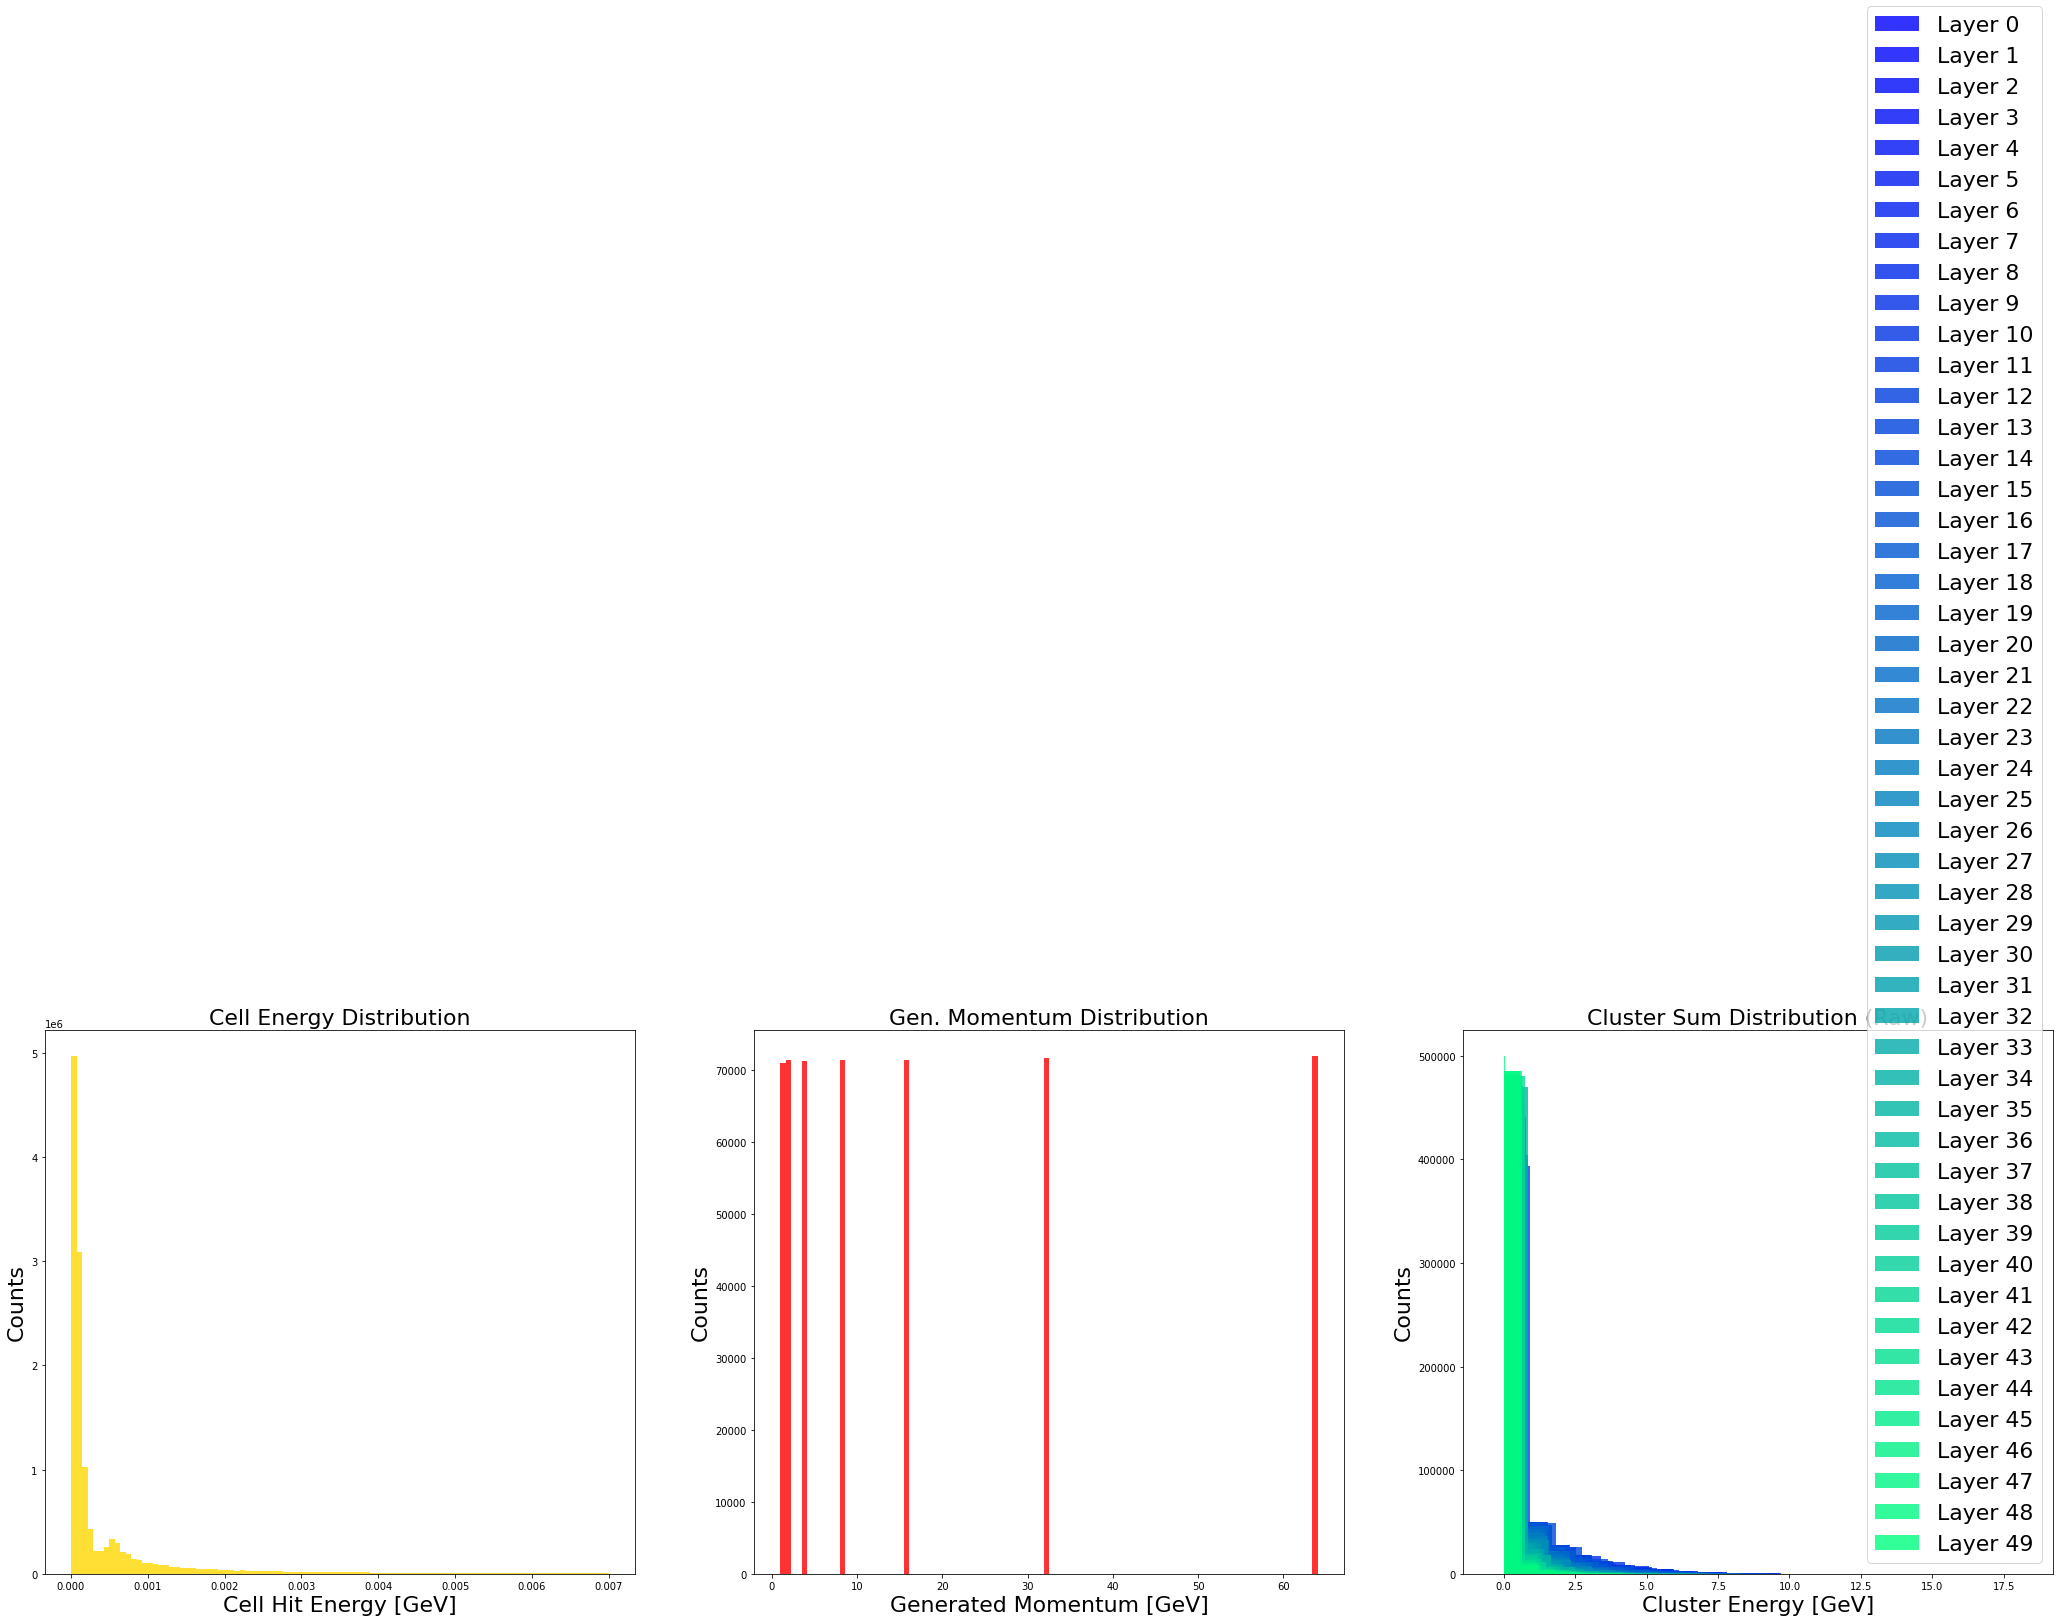

In [6]:
flat_hits_e = load_flat_hits_e(label)
energy_QA_plots(flat_hits_e, GenP, segmented_ClusterSum, label)

#### Plot Clusters vs Generated

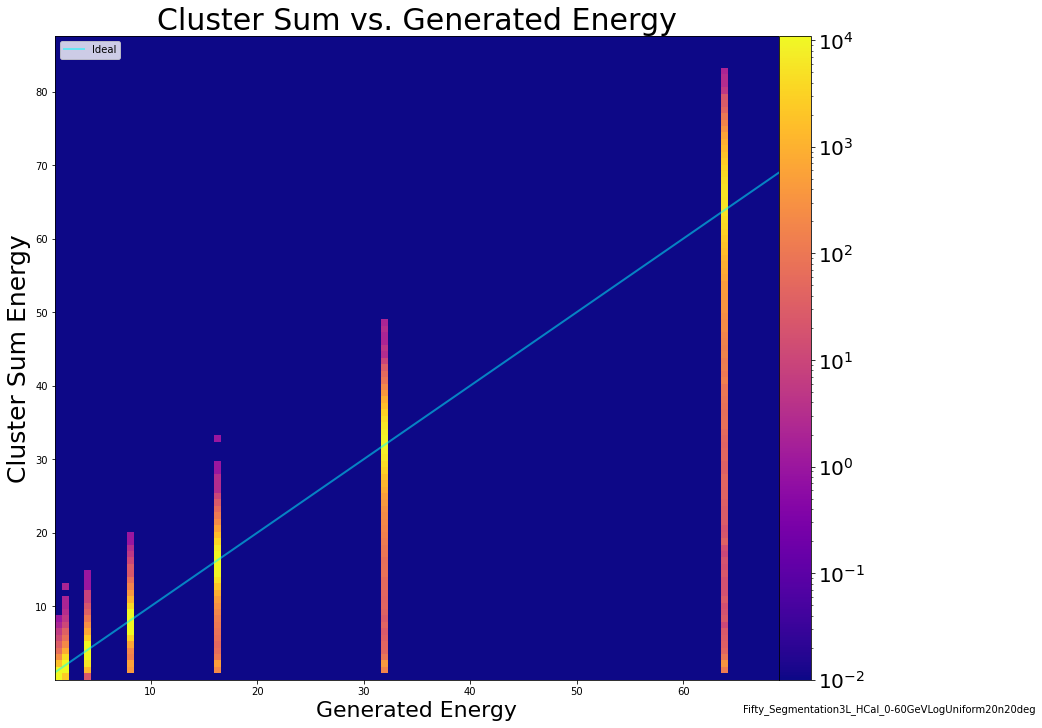

In [7]:
ClusterSum_vs_GenP(ClusterSum, GenP, label)

(array([261928.,  70260.,  28504.,  41670.,  27753.,   1731.,   5637.,
         34844.,  26748.,    768.]),
 array([2.44140629e-03, 8.26217654e+00, 1.65219117e+01, 2.47816468e+01,
        3.30413820e+01, 4.13011171e+01, 4.95608522e+01, 5.78205874e+01,
        6.60803225e+01, 7.43400577e+01, 8.25997928e+01]),
 <BarContainer object of 10 artists>)

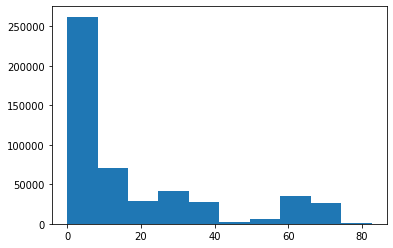

In [8]:
plt.hist(ClusterSum)

In [9]:
from NN_Regression import *

In [10]:
NN_Regression = NN_Regressor(label,n_calo_layers)

In [11]:
if (Do_Training):
    NN_Regression.run_NN_regression()

Loading Segmented Cluster Sum, shape = (499843, 50)
Nevents =  499843
Nevents =  499843
Epoch 1/400


2023-02-07 13:30:58.628934: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:/global/home/users/ftoralesacosta/user_pkg/usr/lib:/global/home/users/ftoralesacosta/user_pkg/usr/lib64:/lib:/lib64:/usr/lib:/usr/lib64
2023-02-07 13:30:58.628963: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-02-07 13:30:58.630015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions

250/250 [==============================] - 2s 6ms/step - loss: 3.2392 - val_loss: 1.4871 - lr: 0.0010
Epoch 2/400
250/250 [==============================] - 1s 4ms/step - loss: 1.4395 - val_loss: 1.4665 - lr: 0.0010
Epoch 3/400
250/250 [==============================] - 1s 5ms/step - loss: 1.4152 - val_loss: 1.4144 - lr: 0.0010
Epoch 4/400
250/250 [==============================] - 1s 5ms/step - loss: 1.4045 - val_loss: 1.4277 - lr: 0.0010
Epoch 5/400
250/250 [==============================] - 1s 4ms/step - loss: 1.3974 - val_loss: 1.4082 - lr: 0.0010
Epoch 6/400
250/250 [==============================] - 1s 5ms/step - loss: 1.3928 - val_loss: 1.4198 - lr: 0.0010
Epoch 7/400
250/250 [==============================] - 1s 5ms/step - loss: 1.3882 - val_loss: 1.3962 - lr: 0.0010
Epoch 8/400
250/250 [==============================] - 1s 5ms/step - loss: 1.3853 - val_loss: 1.4006 - lr: 0.0010
Epoch 9/400
250/250 [==============================] - 1s 4ms/step - loss: 1.3836 - val_loss: 1.3887

In [12]:
x_test = np.load(f"./{label}/x_test.npy")
y_test = np.load(f"./{label}/y_test.npy")
preds = np.load(f"./{label}/predictions.npy")
loss = np.load(f"./{label}/loss.npy")
val_loss = np.load(f"./{label}/val_loss.npy")

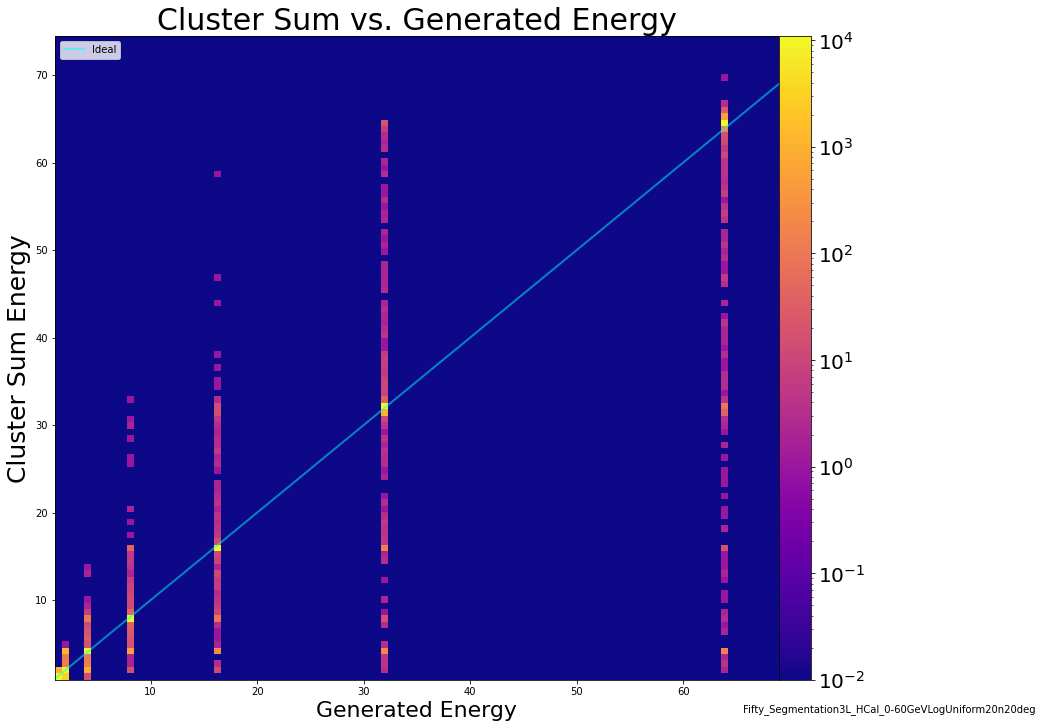

In [13]:
ClusterSum_vs_GenP(preds[:,0],y_test,label)

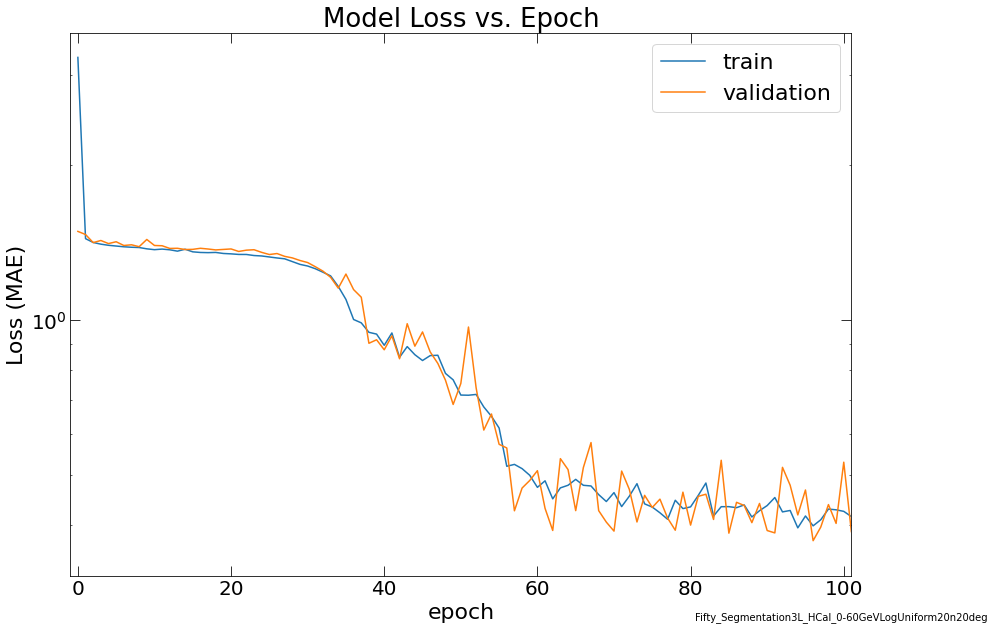

In [14]:
Plot_Loss_Curve(loss,val_loss,label,loss_string="MAE") #label loss yourself here

## Get Dictionaries with Resolution, Scale, and distributions

In [15]:
simple_sum = x_test
if len(np.shape(x_test))>1:
    simple_sum = np.sum(x_test,axis=-1)

NN = get_res_scale(y_test,preds,Energy_Bins,label) #Label here will save. Make sure not to save strawman!
strawman = get_res_scale(y_test,simple_sum,Energy_Bins)

NN_in_RecoBins = get_res_scale_in_reco_bins(y_test,preds,simple_sum,Energy_Bins,label)
strawman_in_RecoBins = get_res_scale_in_reco_bins(y_test,simple_sum,simple_sum,Energy_Bins)

print(NN.keys())
print(NN_in_RecoBins.keys())

/clusterfs/ml4hep_nvme2/ftoralesacosta/regressiononly/functions/data_functions.py:71: RuntimeWarning: invalid value encountered in true_divide
  avg_truth = avg_truth/counter
/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/clusterfs/ml4hep_nvme2/ftoralesacosta/regressiononly/functions/data_functions.py:76: RuntimeWarning: Mean of empty slice
  avg_scale  =   np.nanmean(scale_array,axis=-1)
/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/clusterfs/ml4hep_nvme2/ftoralesacosta/regressiononly/functions/data_functions.py:133: RuntimeWarning: invalid value encountered in true_divide
  avg_reco = avg_reco/counter
/clusterfs/ml4hep_nvme2/ftora

dict_keys(['avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])
dict_keys(['avg_reco', 'avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])


In [16]:
NN["resolution"]

array([0.54739794, 0.10945272, 0.10569107,        nan,        nan,
       0.11068936,        nan,        nan,        nan,        nan,
              nan, 0.10101691,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan])

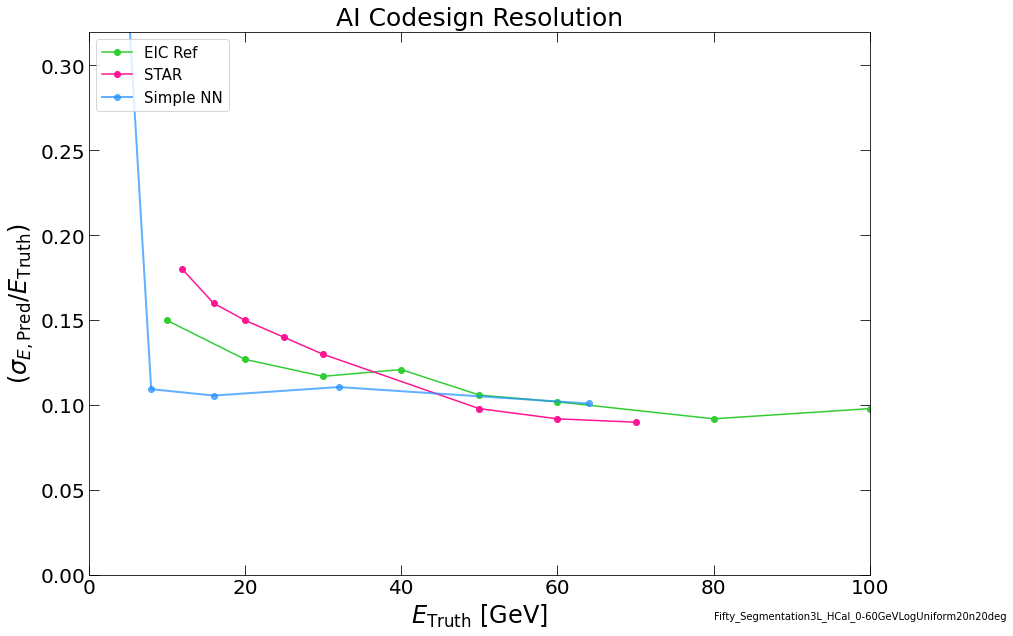

In [17]:
Plot_Resolutions(NN,strawman,label)

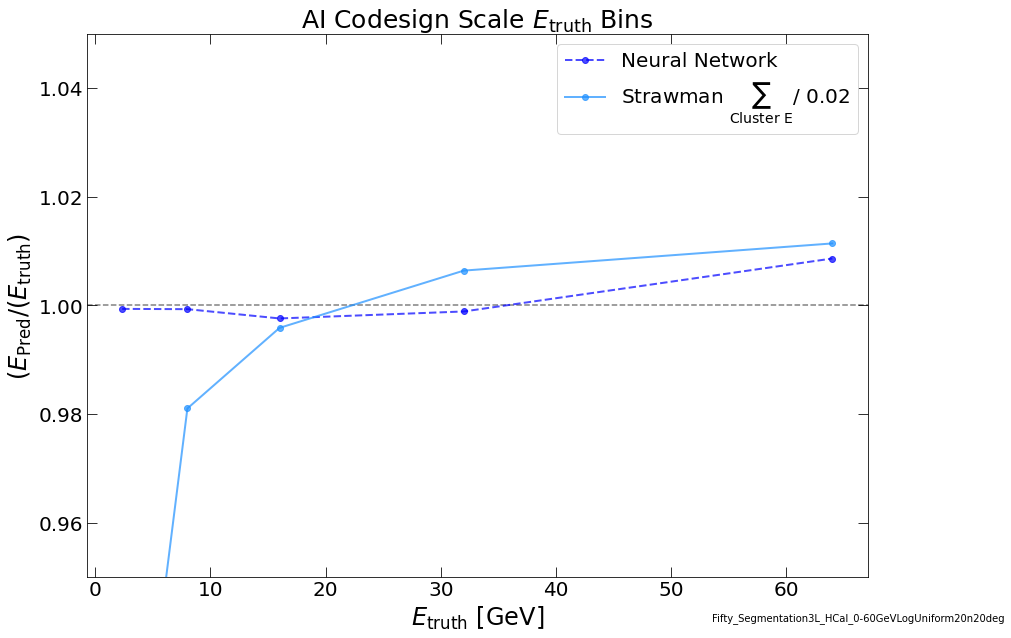

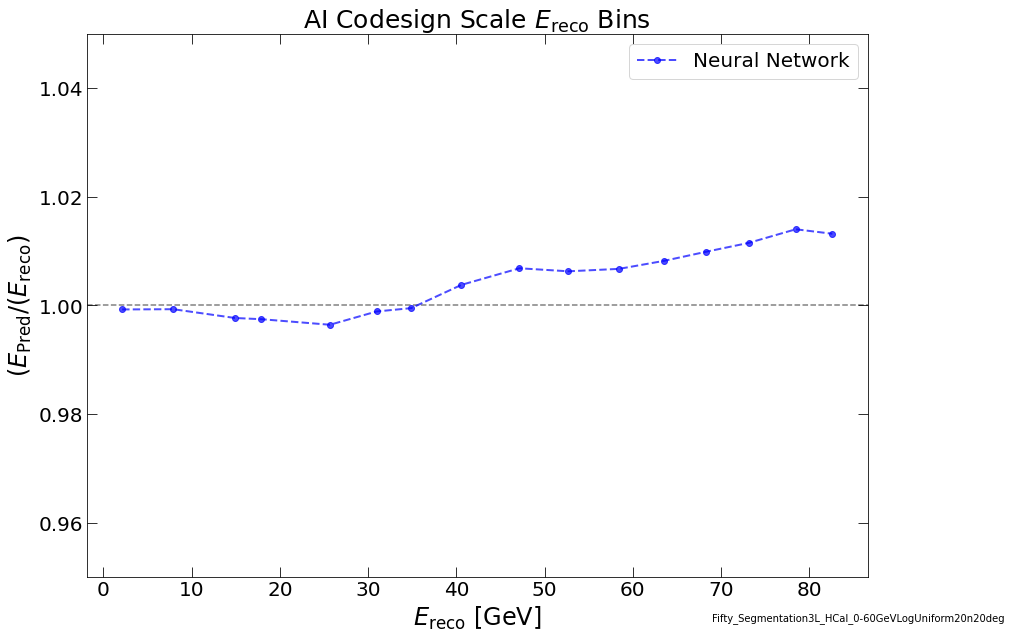

In [18]:
Plot_Energy_Scale(NN,label,sampling_fraction,strawman)
Plot_Energy_Scale(NN_in_RecoBins,label,sampling_fraction,None,"reco")

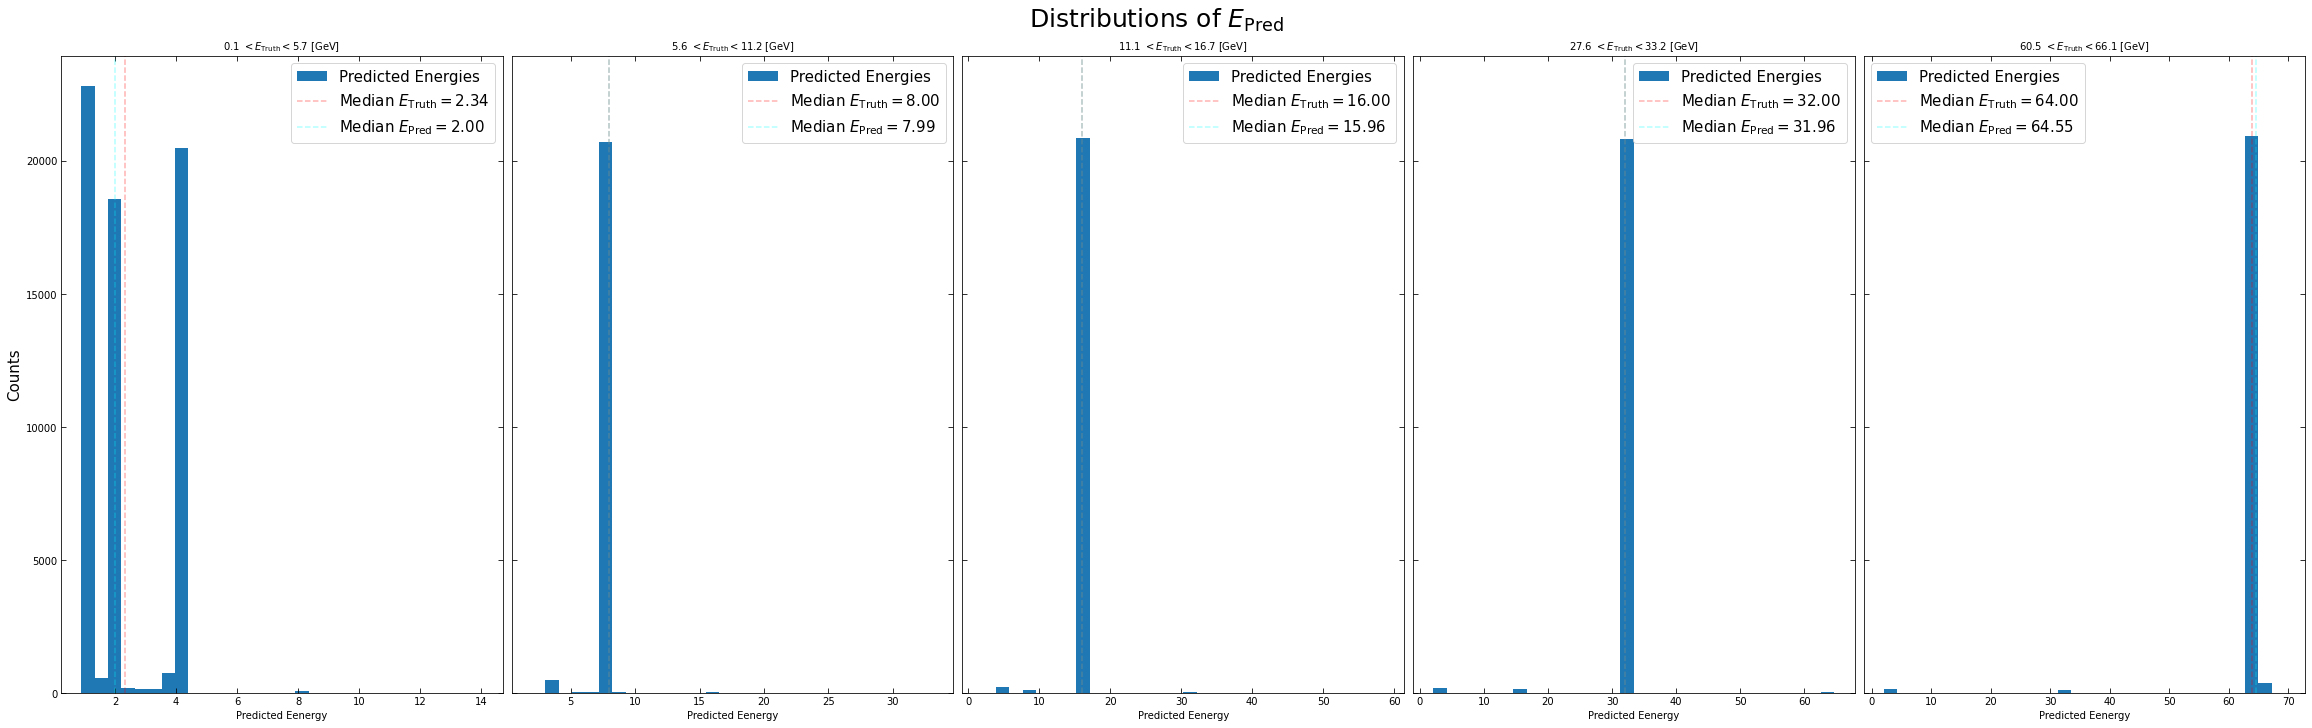

In [19]:
plot_slices(NN["slices"],NN['avg_truth'],label,Energy_Bins,"Truth",)

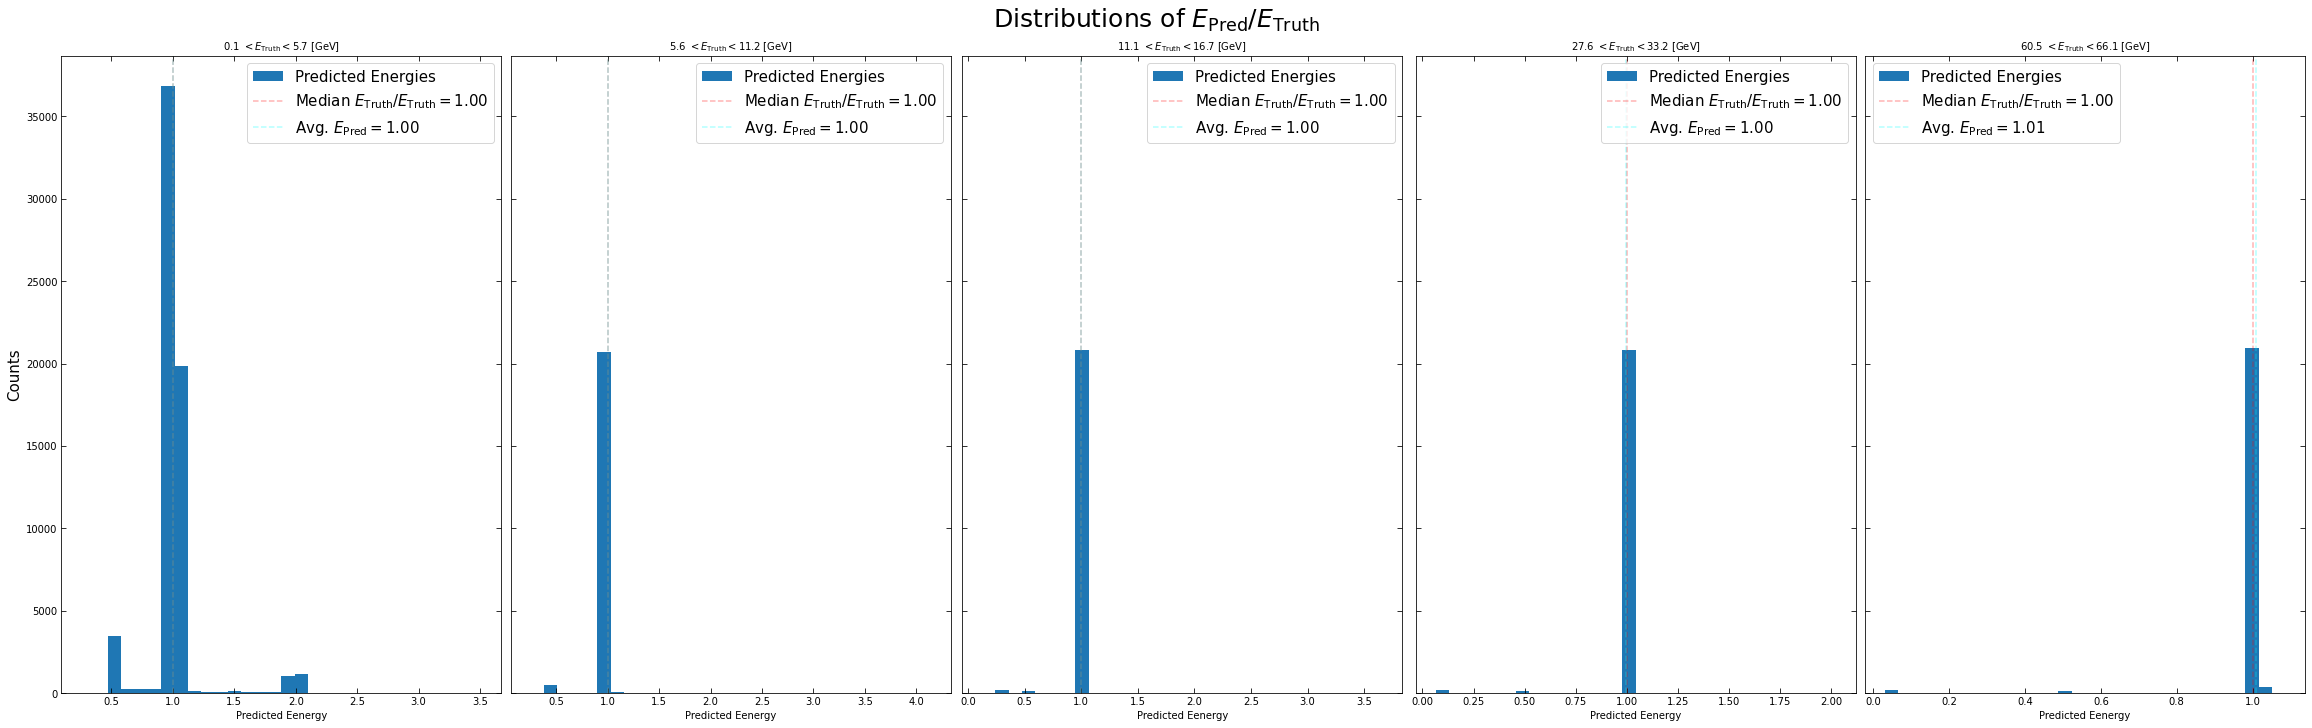

In [20]:
plot_slices(NN["scale_array"],NN['avg_truth'],label, Energy_Bins,"Truth",scale=True)